# EFC 1 - Regressão linear para a predição de manchas solares
    Utilizando os dados fornecidos sobre manchas solares de 1749 até 2019

In [289]:
import csv
import pandas as pd
import numpy as np
from numpy import genfromtxt
from scipy.linalg import toeplitz
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

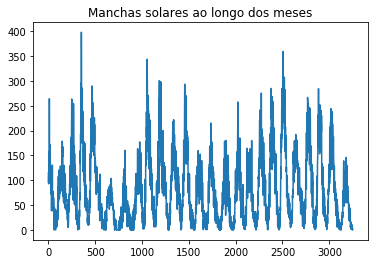

In [290]:
# iniciando os dados do problema
manchas = np.delete(manchas,np.s_[0:2],axis=1)
manchas = np.delete(manchas,0,axis=0)

manchas = genfromtxt('monthly-sunspots.csv', delimiter=',')
manchas = np.delete(manchas,np.s_[0:2],axis=1)
manchas = np.delete(manchas,0,axis=0)

plt.plot(manchas)
plt.title("Manchas solares ao longo dos meses")
plt.show()

In [291]:
# Montando as variáveis de entrada e de saída
K = 24 # máximo valor permitido para K

X = toeplitz(manchas[::-1])# matriz de entrada
y = manchas[K:] # vetor de saída
#y = manchas[:]

XL = X[:,:K]
XL = XL[::-1]
XL = XL[:-K]

Xteste = XL[-120:,:]
yteste = y[-120:,:]
Xtreino = XL[:-120,:]
ytreino = y[:-120,:]

In [292]:
# função para o cálculo o RMSE
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))


Root Mean Square Error: 24.52111196183432


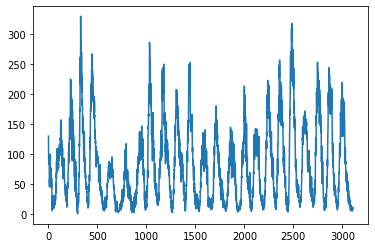

In [293]:
# Regressão linear sem a implementação de K-Fold
reg = LinearRegression(fit_intercept=True).fit(Xtreino, ytreino)
est = reg.predict(Xtreino)
err = rmse(est,ytreino)
print("Root Mean Square Error:",err)
plt.plot(reg.predict(Xtreino))

[24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274, 24.5035049920274]


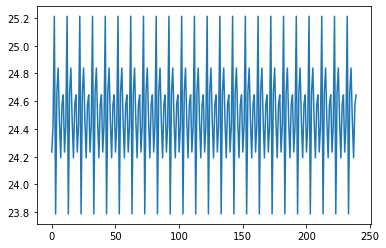

In [294]:
Xtest = XL[-120:,:]
ytest = y[-120:,:]
Xtrain = XL[:-120,:]
ytrain = y[:-120,:]

# implementação do K-Fold
n_splits_kfold = 10
k_max = 24
kf = KFold(n_splits = n_splits_kfold)
rmse_history = []
rmse_acc = []

for k in range(k_max):
    Xtrain_kfold = Xtreino[:,:(k + 1)]

    for train_index, test_index in kf.split(Xtrain_kfold):
        # conjuntos de treino e teste
        X_train_kfold, X_test_kfold = Xtrain[train_index], Xtrain[test_index]
        y_train_kfold, y_test_kfold = ytrain[train_index], ytrain[test_index]
        
        # regressão linear para os conjuntos de teste do k-fold
        reg = LinearRegression(fit_intercept=True).fit(X_train_kfold, y_train_kfold)
        ypred_kfold = reg.predict(X_train_kfold)
        
        # acompanhamento do histórico de RMSE para cada K
        rmse_acc.append(rmse(y_train_kfold, ypred_kfold))
    rmse_history.append(rmse_acc)
    
# escolha do ótimo valor de K a partir dos valores de RMSE
media = []
for i in range(len(acum_rmse)):
    media.append(np.mean(rmse_history[i]))
print(media)
    
plt.plot(rmse_history[0])